## Import libraries

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

from ast import literal_eval

## Perform EDA

In [ ]:
arxiv_data = pd.read_csv(
    'https://github.com/soumik12345/multi-label-text-classification/releases/download/v0.2/arxiv_data.csv'
)
arxiv_data.head()

,titles,summaries,terms
0,Survey on Semantic Stereo Matching / Semantic ...,Stereo matching is one of the widely used tech...,"['cs.CV', 'cs.LG']"
1,FUTURE-AI: Guiding Principles and Consensus Re...,The recent advancements in artificial intellig...,"['cs.CV', 'cs.AI', 'cs.LG']"
2,Enforcing Mutual Consistency of Hard Regions f...,"In this paper, we proposed a novel mutual cons...","['cs.CV', 'cs.AI']"
3,Parameter Decoupling Strategy for Semi-supervi...,Consistency training has proven to be an advan...,['cs.CV']
4,Background-Foreground Segmentation for Interio...,"To ensure safety in automated driving, the cor...","['cs.CV', 'cs.LG']"


In [ ]:
print('There are {} registers in the dataset'.format(len(arxiv_data)))

There are 51774 registers in the dataset


In [ ]:
total_duplicate_titles = sum(arxiv_data["titles"].duplicated())
print('There are {} duplicated titles'.format(total_duplicate_titles))

There are 12802 duplicated titles


In [ ]:
arxiv_data.head()

,titles,summaries,terms
0,Survey on Semantic Stereo Matching / Semantic ...,Stereo matching is one of the widely used tech...,"['cs.CV', 'cs.LG']"
1,FUTURE-AI: Guiding Principles and Consensus Re...,The recent advancements in artificial intellig...,"['cs.CV', 'cs.AI', 'cs.LG']"
2,Enforcing Mutual Consistency of Hard Regions f...,"In this paper, we proposed a novel mutual cons...","['cs.CV', 'cs.AI']"
3,Parameter Decoupling Strategy for Semi-supervi...,Consistency training has proven to be an advan...,['cs.CV']
4,Background-Foreground Segmentation for Interio...,"To ensure safety in automated driving, the cor...","['cs.CV', 'cs.LG']"


In [ ]:
arxiv_data = arxiv_data[~arxiv_data['titles'].duplicated()]
print('There are {} registers in the deduplicated dataset'.format(len(arxiv_data)))

There are 38972 registers in the deduplicated dataset


In [ ]:
arxiv_data["terms"].value_counts()

['cs.CV']                                          12747
['cs.LG', 'stat.ML']                                4074
['cs.LG']                                           2046
['cs.CV', 'cs.LG']                                  1486
['cs.LG', 'cs.AI']                                  1206
                                                   ...  
['cs.LG', 'cs.CL', 'cs.HC', 'stat.ML']                 1
['cs.LG', 'cs.AI', 'cs.CL', 'cs.PL', 'stat.ML']        1
['cs.LG', 'cs.CL', 'stat.ME', 'stat.ML']               1
['cs.LG', 'cs.CL', 'cs.LO', 'stat.ML']                 1
['stat.ML', 'cs.CV', 'cs.LG', 'q-bio.QM']              1
Name: terms, Length: 3157, dtype: int64

In [ ]:
print(sum(arxiv_data["terms"].value_counts() == 1))

2321


In [ ]:
print(arxiv_data["terms"].nunique())

3157


In [ ]:
arxiv_data_filtered = arxiv_data.groupby("terms").filter(lambda x: len(x) > 1)
arxiv_data_filtered.shape

(36651, 3)

In [ ]:
arxiv_data_filtered.head()

,titles,summaries,terms
0,Survey on Semantic Stereo Matching / Semantic ...,Stereo matching is one of the widely used tech...,"['cs.CV', 'cs.LG']"
1,FUTURE-AI: Guiding Principles and Consensus Re...,The recent advancements in artificial intellig...,"['cs.CV', 'cs.AI', 'cs.LG']"
2,Enforcing Mutual Consistency of Hard Regions f...,"In this paper, we proposed a novel mutual cons...","['cs.CV', 'cs.AI']"
3,Parameter Decoupling Strategy for Semi-supervi...,Consistency training has proven to be an advan...,['cs.CV']
4,Background-Foreground Segmentation for Interio...,"To ensure safety in automated driving, the cor...","['cs.CV', 'cs.LG']"


In [ ]:
arxiv_data_filtered["terms"].value_counts()

['cs.CV']                                                         12747
['cs.LG', 'stat.ML']                                               4074
['cs.LG']                                                          2046
['cs.CV', 'cs.LG']                                                 1486
['cs.LG', 'cs.AI']                                                 1206
                                                                  ...  
['cs.CV', 'cs.LG', 'eess.IV', 'eess.SP', 'stat.ML']                   2
['cs.LG', 'cs.CL', 'cs.CV', 'cs.NE', 'stat.ML']                       2
['stat.ML', 'cs.IT', 'cs.LG', 'math.IT', 'math.ST', 'stat.TH']        2
['cs.CV', 'cs.CL', 'cs.LG', 'eess.AS', 'eess.IV']                     2
['cs.LG', 'G.3']                                                      2
Name: terms, Length: 836, dtype: int64

## Convert the string labels to lists of strings

In [ ]:
arxiv_data_filtered["terms"] = arxiv_data_filtered["terms"].apply(lambda x: literal_eval(x))
arxiv_data_filtered["terms"]

0                    [cs.CV, cs.LG]
1             [cs.CV, cs.AI, cs.LG]
2                    [cs.CV, cs.AI]
3                           [cs.CV]
4                    [cs.CV, cs.LG]
                    ...            
51767                       [cs.CV]
51768                       [cs.CV]
51770                [cs.CV, cs.DM]
51771    [stat.ML, cs.LG, q-bio.GN]
51772                       [cs.CV]
Name: terms, Length: 36651, dtype: object

## Use stratified splits because of class imbalance

In [ ]:
test_split = 0.1

train_df, test_df = train_test_split(
    arxiv_data_filtered,
    test_size=test_split,
    stratify = arxiv_data_filtered['terms'].values
)

val_df = test_df.sample(frac=0.5)
test_df.drop(val_df.index, inplace=True)

print('Number of registers in train set: {}'.format(len(train_df)))
print('Number of registers in val set: {}'.format(len(val_df)))
print('Number of registers in test set: {}'.format(len(test_df)))

Number of registers in train set: 32985
Number of registers in val set: 1833
Number of registers in test set: 1833


## Multi-label binarization

In [ ]:
terms = tf.ragged.constant(train_df['terms'].values)
lookup = tf.keras.layers.StringLookup(output_mode='multi_hot')
lookup.adapt(terms)

In [ ]:
vocab = lookup.get_vocabulary()

In [ ]:
print("Vocabulary:\n")
print(vocab)

Vocabulary:

['[UNK]', 'cs.CV', 'cs.LG', 'stat.ML', 'cs.AI', 'eess.IV', 'cs.RO', 'cs.CL', 'cs.NE', 'cs.CR', 'math.OC', 'eess.SP', 'cs.GR', 'cs.SI', 'cs.MM', 'cs.SY', 'cs.IR', 'cs.MA', 'eess.SY', 'cs.HC', 'math.IT', 'cs.IT', 'cs.DC', 'cs.CY', 'stat.AP', 'stat.TH', 'math.ST', 'stat.ME', 'eess.AS', 'cs.SD', 'q-bio.QM', 'q-bio.NC', 'cs.DS', 'cs.GT', 'cs.SE', 'cs.CG', 'cs.NI', 'stat.CO', 'I.2.6', 'math.NA', 'cs.NA', 'physics.chem-ph', 'cs.DB', 'q-bio.BM', 'cs.LO', 'cs.PL', 'cond-mat.dis-nn', '68T45', 'math.PR', 'physics.comp-ph', 'cs.CE', 'cs.AR', 'I.2.10', 'q-fin.ST', 'cond-mat.stat-mech', 'math.DS', 'cs.CC', '68T05', 'quant-ph', 'I.4.6', 'physics.soc-ph', 'physics.data-an', 'physics.ao-ph', 'econ.EM', 'cs.DM', 'q-bio.GN', 'physics.med-ph', 'astro-ph.IM', 'I.4.8', 'math.AT', 'cs.PF', 'I.4', 'q-fin.TR', 'cs.FL', 'I.5.4', 'I.2', '68U10', 'hep-ex', '68T10', 'physics.optics', 'physics.geo-ph', 'cond-mat.mtrl-sci', 'physics.flu-dyn', 'math.AP', 'I.4; I.5', 'I.4.9', 'I.2.6; I.2.8', 'I.2.10; I.4;

In [ ]:
def invert_multi_hot(encoded_labels):
  """Reverse a single multi-hot encoded label to a tuple of vocab terms."""
  hot_indices = np.argwhere(encoded_labels==1.0)[..., 0]
  return np.take(vocab, hot_indices)

In [ ]:
sample_label = train_df["terms"].iloc[0]
print('Original label:', sample_label)

Original label: ['cs.CV']


In [ ]:
label_binarized = lookup([sample_label])
print('Label binarized:', label_binarized)

Label binarized: tf.Tensor(
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0.]], shape=(1, 153), dtype=float32)


In [ ]:
print(len(label_binarized[0]))
print(len(vocab))

153
153


In [ ]:
train_df['summaries'].apply(lambda x: len(x.split())).describe()

count    32985.000000
mean       171.626861
std         45.407348
min          5.000000
25%        140.000000
50%        170.000000
75%        201.000000
max        498.000000
Name: summaries, dtype: float64

In [ ]:
max_sqlen = 150
batch_size = 128
padding_token = '<pad>'
auto = tf.data.AUTOTUNE

In [ ]:
def make_dataset(dataframe, is_train=False):
  labels = tf.ragged.constant(dataframe["terms"].values)
  label_binarized = lookup(labels).numpy()
  dataset = tf.data.Dataset.from_tensor_slices(
      (dataframe['summaries'].values, label_binarized)
  )
  dataset = dataset.shuffle(batch_size * 10) if is_train else dataset
  return dataset.batch(batch_size)

In [ ]:
train_dataset = make_dataset(train_df, is_train=True)
validation_dataset = make_dataset(val_df)
test_dataset = make_dataset(test_df)

## Dataset preview

In [ ]:
text_batch, label_batch = next(iter(train_dataset))

for text, label_bin in zip(text_batch[:5], label_batch[:5]):
  print('text: {}'.format(text))
  print('label binarized: {}'.format(label_bin))
  print('label: {}'.format(invert_multi_hot(label_bin)))
  print('')

text: b'We consider the single image super-resolution problem in a more general case\nthat the low-/high-resolution pairs and the down-sampling process are\nunavailable. Different from traditional super-resolution formulation, the\nlow-resolution input is further degraded by noises and blurring. This\ncomplicated setting makes supervised learning and accurate kernel estimation\nimpossible. To solve this problem, we resort to unsupervised learning without\npaired data, inspired by the recent successful image-to-image translation\napplications. With generative adversarial networks (GAN) as the basic\ncomponent, we propose a Cycle-in-Cycle network structure to tackle the problem\nwithin three steps. First, the noisy and blurry input is mapped to a noise-free\nlow-resolution space. Then the intermediate image is up-sampled with a\npre-trained deep model. Finally, we fine-tune the two modules in an end-to-end\nmanner to get the high-resolution output. Experiments on NTIRE2018 datasets\ndemo

## Vectorization

In [ ]:
vocabulary = set()
train_df['summaries'].str.lower().str.split().apply(vocabulary.update)
vocabulary_size = len(vocabulary)
print(vocabulary_size)

153641


In [ ]:
text_vectorizer = layers.TextVectorization(
    max_tokens=vocabulary_size,
    ngrams=2,
    output_mode='tf_idf'
)

with tf.device("/CPU:0"):
  text_vectorizer.adapt(train_dataset.map(lambda text, label: text))

In [ ]:
train_dataset = train_dataset.map(
    lambda text, label: (text_vectorizer(text), label), num_parallel_calls=auto
).prefetch(auto)

validation_dataset = validation_dataset.map(
    lambda text, label: (text_vectorizer(text), label), num_parallel_calls=auto
).prefetch(auto)

test_dataset = test_dataset.map(
    lambda text, label: (text_vectorizer(text), label), num_parallel_calls=auto
).prefetch(auto)

In [ ]:
text_batch, label_batch = next(iter(train_dataset))

for text, label_bin in zip(text_batch[:5], label_batch[:5]):
  print('text: {}'.format(text))
  print('label binarized: {}'.format(label_bin))
  print('label: {}'.format(invert_multi_hot(label_bin)))
  print('')

text: [382.62814     4.868963    2.1051898 ...   0.          0.
   0.       ]
label binarized: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0.]
label: ['cs.CV']

text: [171.79224     1.3911322   0.        ...   0.          0.
   0.       ]
label binarized: [0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

## Create a text classification model

In [ ]:
def make_model():
  shallow_mlp_model = keras.Sequential([
      layers.Dense(512, activation='relu'),
      layers.Dense(256, activation='relu'),
      layers.Dense(lookup.vocabulary_size(), activation='sigmoid')
  ])
  return shallow_mlp_model

## Train the model

In [ ]:
early_stopping = keras.callbacks.EarlyStopping(
    patience=3,
    monitor='val_loss',
    min_delta=0.001,
    mode='min',
    verbose=1,
    restore_best_weights=True,
)

Epoch 1/20
258/258 [==============================] - 15s 56ms/step - loss: 0.0342 - categorical_accuracy: 0.8487 - val_loss: 0.0190 - val_categorical_accuracy: 0.8974
Epoch 2/20
258/258 [==============================] - 15s 57ms/step - loss: 0.0034 - categorical_accuracy: 0.8905 - val_loss: 0.0253 - val_categorical_accuracy: 0.8816
Epoch 3/20
258/258 [==============================] - 14s 54ms/step - loss: 8.2594e-04 - categorical_accuracy: 0.8568 - val_loss: 0.0321 - val_categorical_accuracy: 0.8576
Epoch 4/20
258/258 [==============================] - 15s 57ms/step - loss: 3.3447e-04 - categorical_accuracy: 0.8209 - val_loss: 0.0363 - val_categorical_accuracy: 0.8396
Epoch 4: early stopping


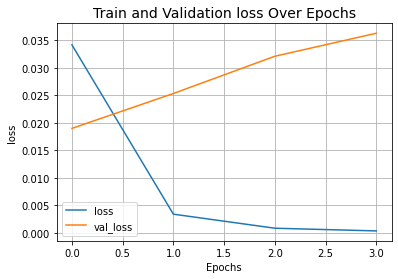

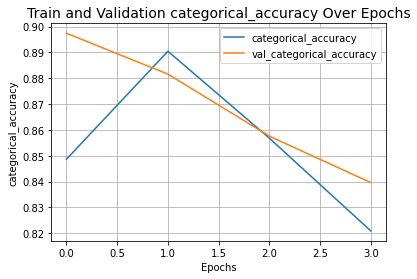

In [ ]:
epochs = 20

shallow_mlp_model = make_model()
shallow_mlp_model.compile(
    loss="binary_crossentropy", optimizer="adam", metrics=["categorical_accuracy"]
)

history = shallow_mlp_model.fit(
    train_dataset, validation_data=validation_dataset, epochs=epochs, callbacks=[early_stopping]
)


def plot_result(item):
  plt.plot(history.history[item], label=item)
  plt.plot(history.history["val_" + item], label="val_" + item)
  plt.xlabel("Epochs")
  plt.ylabel(item)
  plt.title("Train and Validation {} Over Epochs".format(item), fontsize=14)
  plt.legend()
  plt.grid()
  plt.show()

plot_result("loss")
plot_result("categorical_accuracy")

In [ ]:
shallow_mlp_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 512)               78664704  
                                                                 
 dense_4 (Dense)             (None, 256)               131328    
                                                                 
 dense_5 (Dense)             (None, 153)               39321     
                                                                 
Total params: 78,835,353
Trainable params: 78,835,353
Non-trainable params: 0
_________________________________________________________________


## Evaluate the model

In [ ]:
_, categorical_acc = shallow_mlp_model.evaluate(test_dataset)
print(f"Categorical accuracy on the test set: {round(categorical_acc * 100, 2)}%.")

15/15 [==============================] - 1s 42ms/step - loss: 0.0191 - categorical_accuracy: 0.8991
Categorical accuracy on the test set: 89.91%.


## Inference

In [ ]:
# Create a model for inference.
model_for_inference = keras.Sequential([text_vectorizer, shallow_mlp_model])

# Create a small dataset just for demoing inference.
inference_dataset = make_dataset(test_df.sample(100), is_train=False)
text_batch, label_batch = next(iter(inference_dataset))
predicted_probabilities = model_for_inference.predict(text_batch)

# Perform inference.
for i, text in enumerate(text_batch[:5]):
    label = label_batch[i].numpy()[None, ...]
    print(f"Abstract: {text}")
    print(f"Label(s): {invert_multi_hot(label[0])}")
    predicted_proba = [proba for proba in predicted_probabilities[i]]
    top_3_labels = {}
    for score, x in sorted(zip(predicted_probabilities[i], lookup.get_vocabulary()), key=lambda pair: pair[0], reverse=True)[:3]:
      top_3_labels[x] = round(score, 3)
    print(top_3_labels)
    print(f"Predicted Label(s): ({', '.join([label for label in top_3_labels])})")
    print(" ")

4/4 [==============================] - 0s 15ms/step
Abstract: b'$Q$-learning with function approximation is one of the most popular methods\nin reinforcement learning. Though the idea of using function approximation was\nproposed at least 60 years ago, even in the simplest setup, i.e, approximating\n$Q$-functions with linear functions, it is still an open problem on how to\ndesign a provably efficient algorithm that learns a near-optimal policy. The\nkey challenges are how to efficiently explore the state space and how to decide\nwhen to stop exploring in conjunction with the function approximation scheme.\n  The current paper presents a provably efficient algorithm for $Q$-learning\nwith linear function approximation. Under certain regularity assumptions, our\nalgorithm, Difference Maximization $Q$-learning (DMQ), combined with linear\nfunction approximation, returns a near-optimal policy using a polynomial number\nof trajectories. Our algorithm introduces a new notion, the Distributi